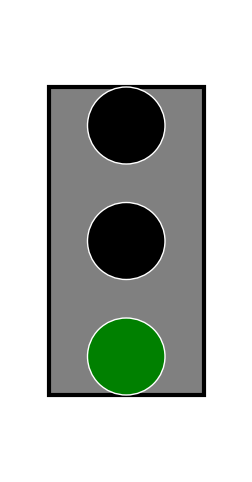

KeyboardInterrupt: 

In [14]:
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import display, clear_output

# Function to draw the traffic light
def draw_traffic_light(color):
    """
    Draws a traffic light with the given active color.

    Parameters:
    color (str): The color of the active light (red, yellow, or green).
    """

    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(3, 6))
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)  # Remove frame for a cleaner look

    # Draw the traffic light box (outer rectangle)
    light_box = patches.Rectangle((0.5, 1), 2, 4, edgecolor='black', facecolor='gray', linewidth=3)
    ax.add_patch(light_box)

    # Define positions for the three lights (Red, Yellow, Green)
    positions = {'red': 4.5, 'yellow': 3, 'green': 1.5}

    # Draw all three lights, highlighting the active one
    for light, y_pos in positions.items():
        facecolor = color if light == color else 'black'  # Only the active light is colored
        ax.add_patch(patches.Circle((1.5, y_pos), 0.5, edgecolor='white', facecolor=facecolor))

    # Clear previous output in Google Colab and display the new figure
    clear_output(wait=True)
    display(fig)
    plt.close(fig)  # Close the figure to avoid memory issues

# Infinite loop to simulate traffic light sequence
while True:
    # Traffic light sequence: Red → Yellow → Green
    for color, duration in [('red', 5), ('yellow', 2), ('green', 5)]:
        draw_traffic_light(color)  # Display the active light
        time.sleep(duration)  # Pause for the duration of each light


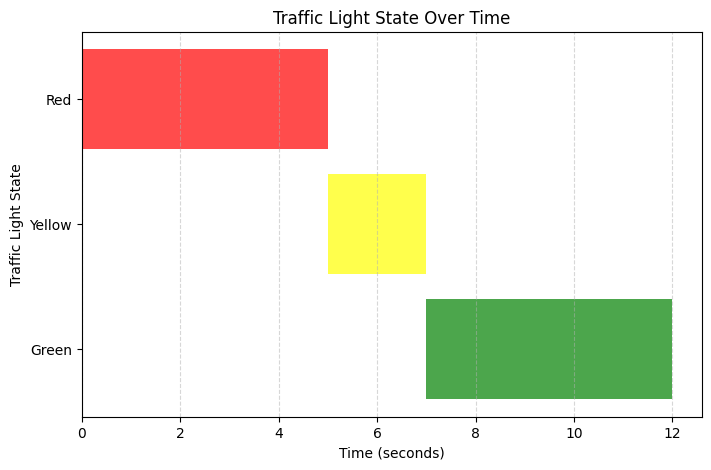

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define the traffic light sequence and durations
light_sequence = ['Red', 'Yellow', 'Green']
durations = [5, 2, 5]  # Red (5s), Yellow (2s), Green (5s)

# Convert lights to numeric values for plotting
light_mapping = {'Red': 3, 'Yellow': 2, 'Green': 1}

# Generate time intervals for each state
time_values = np.cumsum([0] + durations)  # Cumulative sum to create time steps
light_values = [light_mapping[light] for light in light_sequence]

# Create a figure
plt.figure(figsize=(8, 5))

# Plot colored bars for each traffic light phase
for i in range(len(light_sequence)):
    plt.barh(y=light_values[i], width=durations[i], left=time_values[i], color=light_sequence[i].lower(), alpha=0.7)

# Labeling
plt.yticks([3, 2, 1], ['Red', 'Yellow', 'Green'])
plt.xlabel("Time (seconds)")
plt.ylabel("Traffic Light State")
plt.title("Traffic Light State Over Time")
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Show the graph
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128677 (\N{HORIZONTAL TRAFFIC LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **

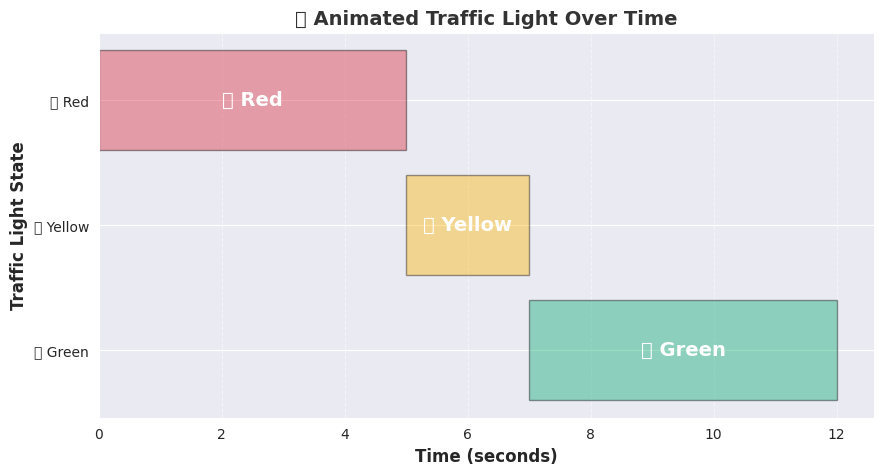

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from IPython.display import display, clear_output

# Apply Seaborn style for a modern look
sns.set_style("darkgrid")

# Define traffic light sequence and durations
light_sequence = ['Red', 'Yellow', 'Green']
durations = [5, 2, 5]  # Red (5s), Yellow (2s), Green (5s)
light_mapping = {'Red': 3, 'Yellow': 2, 'Green': 1}
colors = {'Red': '#D72638', 'Yellow': '#FFB400', 'Green': '#00A86B'}

# Function to display the animated traffic light graph
def show_traffic_light_graph():
    total_time = sum(durations)
    time_values = np.cumsum([0] + durations)

    for elapsed_time in range(total_time + 1):
        clear_output(wait=True)  # Clear previous frame for smooth animation
        plt.figure(figsize=(10, 5))

        # Draw bars with "filling effect"
        for i in range(len(light_sequence)):
            start_time = time_values[i]
            end_time = time_values[i + 1]

            if start_time <= elapsed_time < end_time:
                alpha = 1.0  # Fully visible for active light
                glow = True
            else:
                alpha = 0.4  # Dim the inactive lights
                glow = False

            # Draw the bars with filling effect
            plt.barh(y=light_mapping[light_sequence[i]],
                     width=min(elapsed_time - start_time, durations[i]),
                     left=start_time,
                     color=colors[light_sequence[i]],
                     edgecolor='black', alpha=alpha)

            # Add a glowing effect for the active light
            if glow:
                plt.barh(y=light_mapping[light_sequence[i]],
                         width=durations[i],
                         left=start_time,
                         color=colors[light_sequence[i]],
                         alpha=0.2, zorder=-1)

            # Add traffic light labels inside the bars
            plt.text(start_time + durations[i] / 2, light_mapping[light_sequence[i]],
                     f'🚦 {light_sequence[i]}', ha='center', va='center',
                     fontsize=14, color='white', fontweight='bold')

        # Formatting the graph
        plt.yticks([3, 2, 1], ['🔴 Red', '🟡 Yellow', '🟢 Green'])
        plt.xlabel("Time (seconds)", fontsize=12, fontweight='bold')
        plt.ylabel("Traffic Light State", fontsize=12, fontweight='bold')
        plt.title("🚥 Animated Traffic Light Over Time", fontsize=14, fontweight='bold', color='#333')
        plt.grid(axis='x', linestyle='--', alpha=0.5)

        # Show and pause for animation effect
        display(plt.gcf())
        plt.close()
        time.sleep(0.5)

# Run the animated graph in Google Colab
show_traffic_light_graph()
